# Models
In this notebook, train different models. At the end will be exported the best model.

This notebook cover:

* Feature Scaling 
* Cross Validation + Hyperparameter tuning 
* Train different models (SVM,Neural Network, Logistic Regression, Random Forest, Gradient Boosting)
* Model Selection
* Feature Importance/ Feature Elimination
* Metrics 
* Export best model

## Import

In [1]:
import pandas as pd
import pyprojroot
from sklearn.metrics import precision_recall_fscore_support
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



## Paths

In [2]:
root_path =  pyprojroot.here()
data_processed_folder = (root_path / "data"/'processed')
models_folder = (root_path / "models")

* Read dataframe

In [3]:
df = pd.read_csv(data_processed_folder/'pictures.csv')

* Constants

In [4]:
feature_columns = ['b_bgr_mean','g_bgr_mean','r_bgr_mean','h_hsv_mean','s_hsv_mean',\
'v_hsv_mean','l_lab_mean','a_lab_mean','b_lab_mean','b_bgr_std','g_bgr_std','r_bgr_std',\
'h_hsv_std','s_hsv_std','v_hsv_std','l_lab_std','a_lab_std','b_lab_std'
]
target_column = 'color'

# Preparing Data

In [5]:
X = df[feature_columns]
y = df[target_column].values

* Feature scaling

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
dict(zip(feature_columns,X[0]))

{'b_bgr_mean': 0.9218758706116625,
 'g_bgr_mean': -0.24277016711618238,
 'r_bgr_mean': -1.8562252992889867,
 'h_hsv_mean': 2.051317157021624,
 's_hsv_mean': 2.774457885985387,
 'v_hsv_mean': 0.27577374353112716,
 'l_lab_mean': -0.31071535947737555,
 'a_lab_mean': -0.550672487967333,
 'b_lab_mean': -2.888146382899049,
 'b_bgr_std': -0.33184172259240213,
 'g_bgr_std': -0.5823828753642223,
 'r_bgr_std': -0.265741111893936,
 'h_hsv_std': -0.5971872072191281,
 's_hsv_std': 0.10909976358637759,
 'v_hsv_std': -0.9927300623621939,
 'l_lab_std': -0.9497327744654422,
 'a_lab_std': 1.7573013668773538,
 'b_lab_std': 1.187729057355215}

* Train/Test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

# Train different models

In [13]:
def generic_train(model,tunning,name) -> pd.DataFrame:
    """
    Train a model using a grid search
    """
    classifier = GridSearchCV(model,tunning,cv=5,return_train_score=False,n_jobs=-1,verbose=0)
    classifier.fit(x_train,y_train)
    df_score_lr = pd.DataFrame(classifier.cv_results_)[['params','mean_test_score','std_test_score']]
    df_score_lr['classifier'] = name
    return df_score_lr.sort_values(by='mean_test_score',ascending=False)

* Logistic Regression

In [18]:
model = LogisticRegression(n_jobs=-1,max_iter=1500,random_state=42)
tunning = {'C':[0.1,0.2,0.3,0.5,0.8,1.2,2,3,5,7,10,15,20]}
report_logistic = generic_train(model,tunning,'logistic_regression')

report_logistic

,params,mean_test_score,std_test_score,classifier
11,{'C': 15},0.862421,0.003955,logistic_regression
12,{'C': 20},0.862176,0.004218,logistic_regression
10,{'C': 10},0.861277,0.003958,logistic_regression
9,{'C': 7},0.860460,0.004507,logistic_regression
8,{'C': 5},0.859560,0.005780,logistic_regression
7,{'C': 3},0.858089,0.004439,logistic_regression
6,{'C': 2},0.857026,0.004897,logistic_regression
5,{'C': 1.2},0.855964,0.005356,logistic_regression
4,{'C': 0.8},0.853675,0.005078,logistic_regression
3,{'C': 0.5},0.852367,0.007347,logistic_regression


In [ ]:

model = MLPClassifier(max_iter=500,random_state=42,n_iter_no_change=400,learning_rate_init=0.001,batch_size=50)
tunning = {'alpha':[0,0.5,1],'hidden_layer_sizes':[(100),(200),(400),(50,50),(10,10,10)],'solver':['lbfgs','adam']}

report_neural = generic_train(model,tunning,'neural_network')

report_neural

In [20]:
report_neural

,params,mean_test_score,std_test_score,classifier
24,"{'alpha': 1, 'hidden_layer_sizes': 400, 'solve...",0.874683,0.004083,neural_network
14,"{'alpha': 0.5, 'hidden_layer_sizes': 400, 'sol...",0.871331,0.004381,neural_network
22,"{'alpha': 1, 'hidden_layer_sizes': 200, 'solve...",0.870024,0.005491,neural_network
1,"{'alpha': 0, 'hidden_layer_sizes': 100, 'solve...",0.869778,0.002493,neural_network
20,"{'alpha': 1, 'hidden_layer_sizes': 100, 'solve...",0.869370,0.002151,neural_network
12,"{'alpha': 0.5, 'hidden_layer_sizes': 200, 'sol...",0.868716,0.004885,neural_network
5,"{'alpha': 0, 'hidden_layer_sizes': 400, 'solve...",0.863566,0.004124,neural_network
3,"{'alpha': 0, 'hidden_layer_sizes': 200, 'solve...",0.862913,0.006609,neural_network
10,"{'alpha': 0.5, 'hidden_layer_sizes': 100, 'sol...",0.861195,0.004338,neural_network
28,"{'alpha': 1, 'hidden_layer_sizes': (10, 10, 10...",0.860295,0.004044,neural_network


In [21]:

model = RandomForestClassifier(random_state=1, n_jobs=-1,warm_start=True)
tunning = {'n_estimators':list(range(10, 201, 10)),'max_depth':[10, 15, 20, 25]}
report_random_forest = generic_train(model,tunning,'random_forest')
report_random_forest

,params,mean_test_score,std_test_score,classifier
76,"{'max_depth': 25, 'n_estimators': 170}",0.836916,0.005935,random_forest
54,"{'max_depth': 20, 'n_estimators': 150}",0.836671,0.005483,random_forest
77,"{'max_depth': 25, 'n_estimators': 180}",0.836507,0.006111,random_forest
48,"{'max_depth': 20, 'n_estimators': 90}",0.836426,0.005992,random_forest
52,"{'max_depth': 20, 'n_estimators': 130}",0.836426,0.005472,random_forest
...,...,...,...,...
20,"{'max_depth': 15, 'n_estimators': 10}",0.813537,0.005317,random_forest
1,"{'max_depth': 10, 'n_estimators': 20}",0.811575,0.003451,random_forest
40,"{'max_depth': 20, 'n_estimators': 10}",0.809124,0.006940,random_forest
60,"{'max_depth': 25, 'n_estimators': 10}",0.805690,0.003514,random_forest


In [22]:
model = SVC(random_state=1)

tunning = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

report_svm = generic_train(model,tunning,'svm')

report_svm

,params,mean_test_score,std_test_score,classifier
17,"{'C': 100, 'gamma': 0.01}",0.878526,0.002072,svm
22,"{'C': 1000, 'gamma': 0.01}",0.875501,0.001424,svm
23,"{'C': 1000, 'gamma': 0.001}",0.874274,0.005467,svm
12,"{'C': 10, 'gamma': 0.01}",0.869779,0.002657,svm
11,"{'C': 10, 'gamma': 0.1}",0.866836,0.002569,svm
18,"{'C': 100, 'gamma': 0.001}",0.863974,0.003847,svm
6,"{'C': 1, 'gamma': 0.1}",0.863810,0.004388,svm
24,"{'C': 1000, 'gamma': 0.0001}",0.859151,0.006949,svm
16,"{'C': 100, 'gamma': 0.1}",0.852775,0.004292,svm
7,"{'C': 1, 'gamma': 0.01}",0.849260,0.003987,svm


In [24]:

model = GradientBoostingClassifier(n_iter_no_change=20,learning_rate=1,random_state=1)
tunning  = {
    "n_estimators":[5,50],
    "max_depth":[1,100]
}

report_gbc = generic_train(model,tunning,'gradient_boosting')

report_gbc

,params,mean_test_score,std_test_score,classifier
3,"{'max_depth': 100, 'n_estimators': 50}",0.782882,0.006511,gradient_boosting
2,"{'max_depth': 100, 'n_estimators': 5}",0.774299,0.006002,gradient_boosting
1,"{'max_depth': 1, 'n_estimators': 50}",0.684290,0.063180,gradient_boosting
0,"{'max_depth': 1, 'n_estimators': 5}",0.675140,0.021515,gradient_boosting


# Model Selection

In [25]:
best_models_df = pd.concat([report_gbc[0:1],report_svm[0:1],report_random_forest[0:1],report_neural[0:1],report_logistic[0:1]])

In [26]:
best_models_df.sort_values(by='mean_test_score',ascending=False)

,params,mean_test_score,std_test_score,classifier
17,"{'C': 100, 'gamma': 0.01}",0.878526,0.002072,svm
24,"{'alpha': 1, 'hidden_layer_sizes': 400, 'solve...",0.874683,0.004083,neural_network
11,{'C': 15},0.862421,0.003955,logistic_regression
76,"{'max_depth': 25, 'n_estimators': 170}",0.836916,0.005935,random_forest
3,"{'max_depth': 100, 'n_estimators': 50}",0.782882,0.006511,gradient_boosting


The best model is svm with parameters {'C': 100, 'gamma': 0.01} with a accuracy score of 0.878 +- 0.0021

# Inspect Best Model

* Check the best model in test data

In [60]:
svm_model = SVC(random_state=1,C=100,gamma=0.01)
svm_model.fit(x_train,y_train)
svm_model.score(x_test,y_test)

0.8852378616969102

* Calculate feature importance using `permutation_importance`

In [29]:
perm_importance = permutation_importance(svm_model, x_test, y_test)

## Feature Importance

In [30]:
df_feature_importance = pd.DataFrame({"feature":feature_columns,"importance":perm_importance.importances_mean})
df_feature_importance= df_feature_importance.sort_values(by='importance',ascending=False)
df_feature_importance= df_feature_importance.reset_index(drop=True)
df_feature_importance

,feature,importance
0,b_lab_mean,0.277048
1,a_lab_mean,0.256891
2,s_hsv_mean,0.172290
3,a_lab_std,0.131976
4,v_hsv_mean,0.130603
5,r_bgr_mean,0.092692
6,l_lab_std,0.086219
7,g_bgr_std,0.081511
8,b_bgr_std,0.078225
9,v_hsv_std,0.075331


* LAB features contain the most important features (Top 0,1,4)
* By General, mean attributes are more important thar std hsv (Top 0,1,2,4,5)

In [37]:
features =df_feature_importance['feature'].values.tolist()

## Feature elimination

In [41]:
info = []

for i in range(1,len(features)):
    features_split = features[0:i]
    X = df.loc[:, features_split]
    X = scaler.fit_transform(X)
    y = df[target_column].values
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)
    model = SVC(random_state=1,C=100,gamma=0.01)
    model.fit(x_train,y_train)

    score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    precision,recall,fscore,_ = precision_recall_fscore_support(y_test, y_pred, average='weighted',zero_division=0)
    info.append([i,score,precision,recall,fscore])
    print(f'#features={i} - score=',"{:.2f}".format(score))
    print('precision={:.2f} recall={:.2f} fscore={:.2f}'.format(precision,recall,fscore))
    print()

    

#features=1 - score= 0.48
precision=0.33 recall=0.48 fscore=0.38

#features=2 - score= 0.66
precision=0.62 recall=0.66 fscore=0.63

#features=3 - score= 0.73
precision=0.73 recall=0.73 fscore=0.73

#features=4 - score= 0.77
precision=0.77 recall=0.77 fscore=0.77

#features=5 - score= 0.82
precision=0.82 recall=0.82 fscore=0.82

#features=6 - score= 0.82
precision=0.82 recall=0.82 fscore=0.82

#features=7 - score= 0.86
precision=0.86 recall=0.86 fscore=0.86

#features=8 - score= 0.86
precision=0.86 recall=0.86 fscore=0.86

#features=9 - score= 0.87
precision=0.87 recall=0.87 fscore=0.87

#features=10 - score= 0.87
precision=0.87 recall=0.87 fscore=0.87

#features=11 - score= 0.87
precision=0.87 recall=0.87 fscore=0.87

#features=12 - score= 0.87
precision=0.87 recall=0.87 fscore=0.87

#features=13 - score= 0.88
precision=0.88 recall=0.88 fscore=0.88

#features=14 - score= 0.88
precision=0.88 recall=0.88 fscore=0.88

#features=15 - score= 0.88
precision=0.88 recall=0.88 fscore=0.88

#fea

In [42]:
df_feature_elimination =  pd.DataFrame(info,columns=['#features','score','precision','recall','fscore'])

<AxesSubplot: title={'center': '#features Vs Fscore'}, xlabel='#features'>

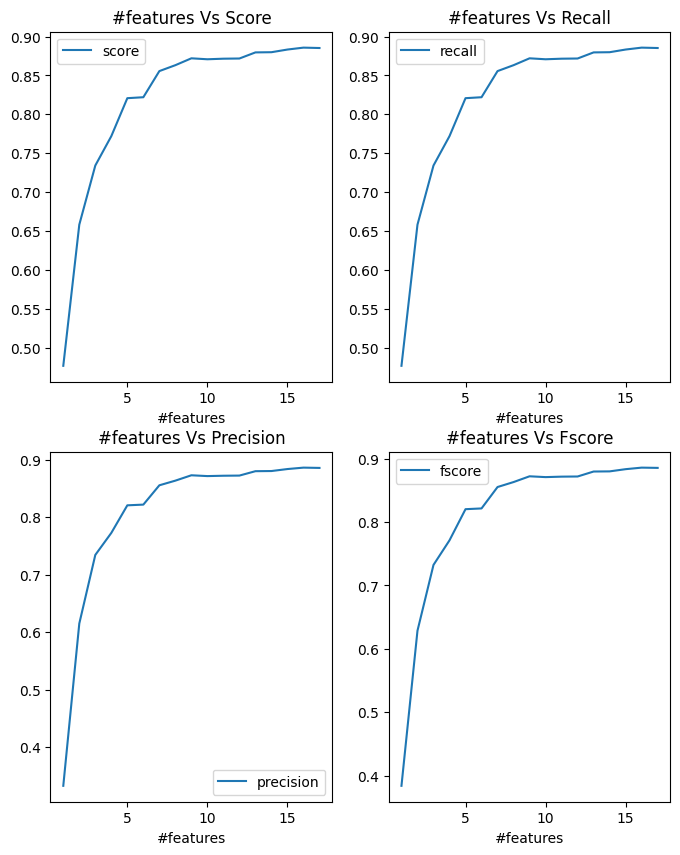

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8, 10))
df_feature_elimination.plot(x='#features',y='score',title='#features Vs Score', ax=axes[0,0])
df_feature_elimination.plot(x='#features',y='recall',title='#features Vs Recall', ax=axes[0,1])
df_feature_elimination.plot(x='#features',y='precision',title='#features Vs Precision', ax=axes[1,0])
df_feature_elimination.plot(x='#features',y='fscore',title='#features Vs Fscore', ax=axes[1,1])

Feature elimination is not suitable in this case. All features contribuite to get better metrics.

* Confusion matrix

In [64]:
categories =df[target_column].unique().tolist()

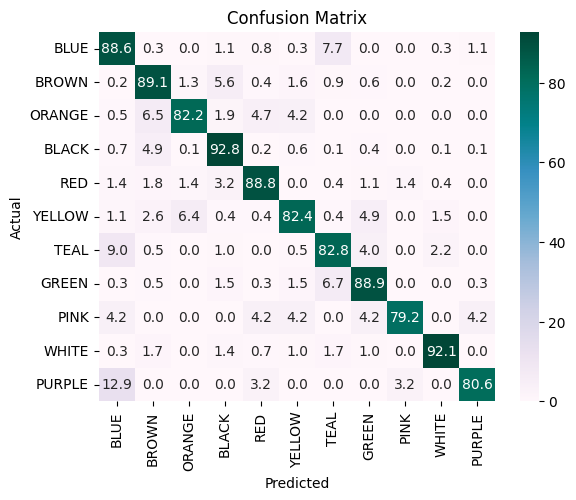

In [95]:
y_pred= svm_model.predict(x_test)
cm =confusion_matrix(y_test,y_pred,labels=categories,normalize='true')
cm_df = pd.DataFrame(cm,columns=categories,index=categories)*100
plot = sns.heatmap(cm_df,cmap="PuBuGn",annot=True,fmt='.1f')
plot.set(title='Confusion Matrix')
plot.set(xlabel='Predicted', ylabel='Actual')
print()

# Export model

In [98]:
from joblib import dump, load
dump(svm_model, models_folder/'svm_classifier.joblib')
dump(scaler, models_folder/'scaler.joblib')

['/home/x/Desktop/portfolio/google-arts-and-culture/models/scaler.joblib']